In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Exhaustive Exploratory Data Anaysis on Crime Data

## Brief and EXpectations:
-  This Exploratory data analysis (EDA) on the Chicago crime dataset focuses on understanding the structure and characteristics of the dataset through various techniques such as summary statistics,time series analysis, data visualization, and hypothesis testing. The primary goal of EDA is to uncover patterns, relationships, and anomalies in the data, which can then inform further analysis and modeling decisions.

###_*Please Note*_
that there would be a difference between what in this codebook and the report. The reason was becuase, this exploration is exhuastive, that is, trying to find as many patterns and trend as possible in order to generate more insights.

** Just a bit of the insights here were recoreded in the report.

### Project Activities:

A. POSSIBLE QUESTIONS TO GUIDE OUR ANALYSIS.

Analysing both the categorical and numerical variable.
-  What are the most common types of crimes in the dataset?
-  Is there a trend in the number of reported incidents over the years?
- What are the top locations where incidents occur?
- How does the distribution of arrests vary across different types of crimes?
- What is the proportion of domestic-related incidents compared to others?
- Are certain types of crimes more prevalent in specific community areas or districts?

Time Series Analysis:

- How does the number of reported incidents change over time?
- Are there any seasonal patterns in crime rates?
- Is there an increasing or decreasing trend in specific types of crimes over the years?
- Are there any significant changes in crime rates after certain policy implementations or events?

B. CONDUCTING EDA (Each having its own specific visualization)

- Data Cleaning(box plot to identify outliers, handle outliers, missing values, adjust datatype if need be, etc)
- Descriptive Statistics(summary of numerical variables and frequency distribution analysis of categorical variables)
- Univariate Analysis (histogram or bar plot can be used)
- bBivariate Analysis (scatter plots, box plot can be used)
- MUltivariate Analysis(heatmap, pairplots can be used)
- Time series Analysis
 . Trend Analysis(Identify long term trends in reported incidents)
 . Seasonality Analysis( Detect seasonal patterns or cycles in crime rates)
 . Autocorrelation analysis(Examine correlations between observations at different time lags
 . Forecating(usinng time series forecasting models to predict future crime rates(optional))


## import libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import statsmodels.api as sm
import os
#!pip freeze > requirements.txt # to maintain the built environment.... you can run this command '!pip install -r requirements.txt'


## Load Cleaned Dataset....

In [2]:
crime_data = pd.read_csv("Crimes_-_2001_to_Present.csv", parse_dates=['Date'], date_format='%m/%d/%Y %I:%M:%S %p', low_memory=False)

In [ ]:
crime_data.head(3)

,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,...,FBI Code,Year,Updated On,Latitude,Longitude,Time,Day,Week,Month,Season
0,HP485721,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,...,14,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,14:30:00,Saturday,30,July,Summer
1,JB372830,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,...,15,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,10:57:00,Tuesday,31,July,Summer
2,HN308568,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,...,05,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,10:30:00,Friday,17,April,Spring


## Begin Exploration

#### * How many years data is this?

In [3]:
#year = crimes.Year.unique()
crime_data.Year = crime_data.Year.astype('int')

In [4]:
year = crime_data.Year
year = year.sort_values().unique()
_ = [print(year) for year in year]
print('we have from 2001 to 2022, that is, we have 22 years data.')

2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
we have from 2001 to 2022, that is, we have 22 years data.


In [ ]:
# Check the size of the dataset
crime_data.shape

In [ ]:
# Check for the data types
crime_data.info()

## Descriptive Analysis(Numerical variables)
- Using the .describe() function.
- assign it to the variable name 'summary'

In [ ]:
# Summary statistics
print("\nSummary Statistics:")
print(crime_data.describe())


Summary Statistics:
               Beat      District          Ward          Year      Latitude  \
count  2.278713e+06  2.278713e+06  2.278713e+06  2.278713e+06  2.278713e+06   
mean   1.186441e+03  1.129071e+01  2.315493e+01  2.009638e+03  4.184211e+01   
std    7.026833e+02  6.946692e+00  1.333996e+01  6.019739e+00  8.830600e-02   
min    1.110000e+02  1.000000e+00  1.000000e+00  2.001000e+03  3.661945e+01   
25%    6.210000e+02  6.000000e+00  1.100000e+01  2.004000e+03  4.176856e+01   
50%    1.034000e+03  1.000000e+01  2.400000e+01  2.009000e+03  4.185585e+01   
75%    1.731000e+03  1.700000e+01  3.200000e+01  2.014000e+03  4.190671e+01   
max    2.535000e+03  3.100000e+01  5.000000e+01  2.022000e+03  4.202291e+01   

          Longitude          Week  
count  2.278713e+06  2.278713e+06  
mean  -8.767163e+01  2.662263e+01  
std    6.084543e-02  1.458931e+01  
min   -9.168657e+01  1.000000e+00  
25%   -8.771373e+01  1.400000e+01  
50%   -8.766592e+01  2.700000e+01  
75%   -8.762820

#### Univariate Analysis of District

In [ ]:
# Summary statistics
summary_stats = crime_data['District'].describe()
print("Summary Statistics:")
print(summary_stats)
print()

Summary Statistics:
count    2.278713e+06
mean     1.129071e+01
std      6.946692e+00
min      1.000000e+00
25%      6.000000e+00
50%      1.000000e+01
75%      1.700000e+01
max      3.100000e+01
Name: District, dtype: float64



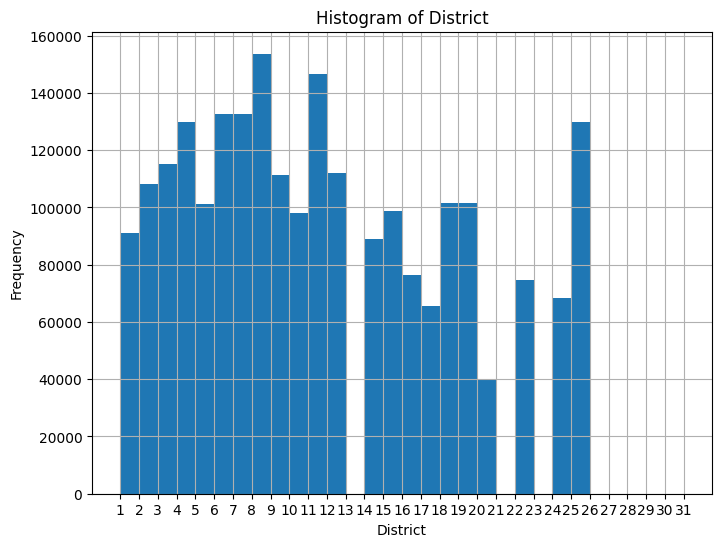

In [ ]:
# Histogram
plt.figure(figsize=(8, 6))
crime_data['District'].hist(grid=True, bins=30)
plt.title('Histogram of District')
plt.xlabel('District')
plt.ylabel('Frequency')
plt.xticks(range(int(crime_data['District'].min()), int(crime_data['District'].max()) + 1, 1))  # Set x-axis ticks to increase by 1
plt.grid(True)
plt.show()

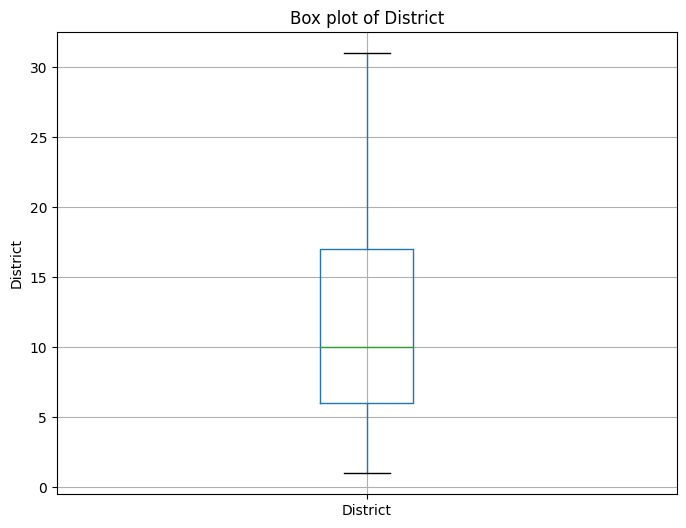

In [ ]:
# Box plot
plt.figure(figsize=(8, 6))
crime_data.boxplot(column='District')
plt.title('Box plot of District')
plt.ylabel('District')
plt.grid(True)
plt.show()

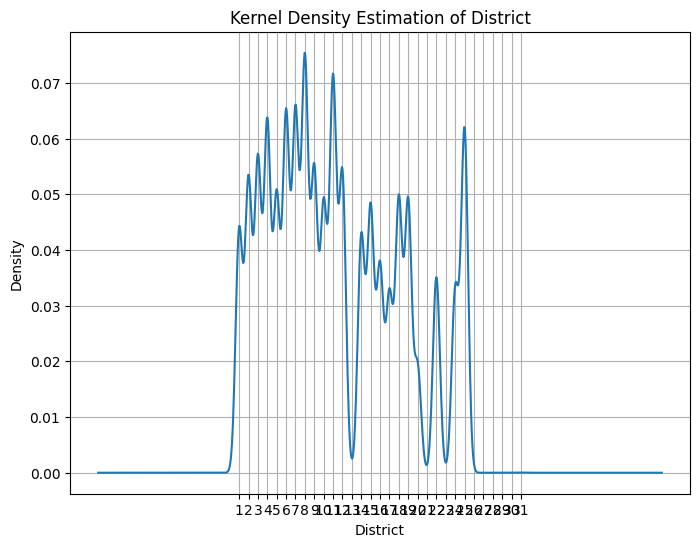

In [ ]:
# KDE plot (Kernel Density Estimation)
plt.figure(figsize=(8, 6))
crime_data['District'].plot.kde()
plt.title('Kernel Density Estimation of District')
plt.xlabel('District')
plt.ylabel('Density')
plt.xticks(range(int(crime_data['District'].min()), int(crime_data['District'].max()) + 1, 1))
plt.grid(True)
plt.show()

#### Univariate Analysis of Ward

In [ ]:
# Summary statistics
summary_stats = crime_data['Ward'].describe()
print("Summary Statistics:")
print(summary_stats)
print()

Summary Statistics:
count    2.278713e+06
mean     2.315493e+01
std      1.333996e+01
min      1.000000e+00
25%      1.100000e+01
50%      2.400000e+01
75%      3.200000e+01
max      5.000000e+01
Name: Ward, dtype: float64



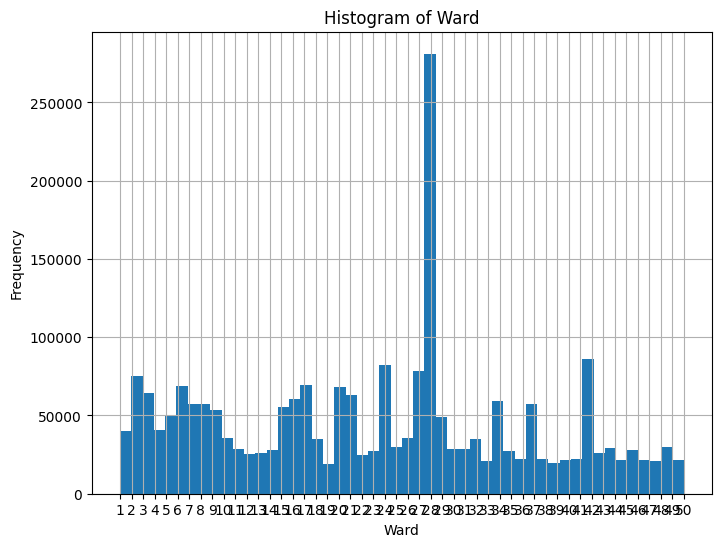

In [ ]:
# Histogram
plt.figure(figsize=(8, 6))
crime_data['Ward'].hist(grid=True, bins=50)
plt.title('Histogram of Ward')
plt.xlabel('Ward')
plt.ylabel('Frequency')
plt.xticks(range(int(crime_data['Ward'].min()), int(crime_data['Ward'].max()) + 1, 1))  # Set x-axis ticks to increase by 1
plt.grid(True)
plt.show()

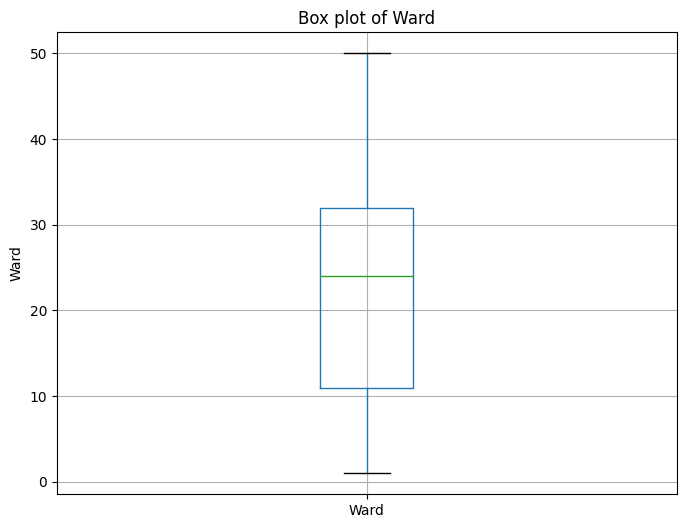

In [ ]:
# Box plot
plt.figure(figsize=(8, 6))
crime_data.boxplot(column= 'Ward')
plt.title('Box plot of Ward')
plt.ylabel('Ward')
plt.grid(True)
plt.show()

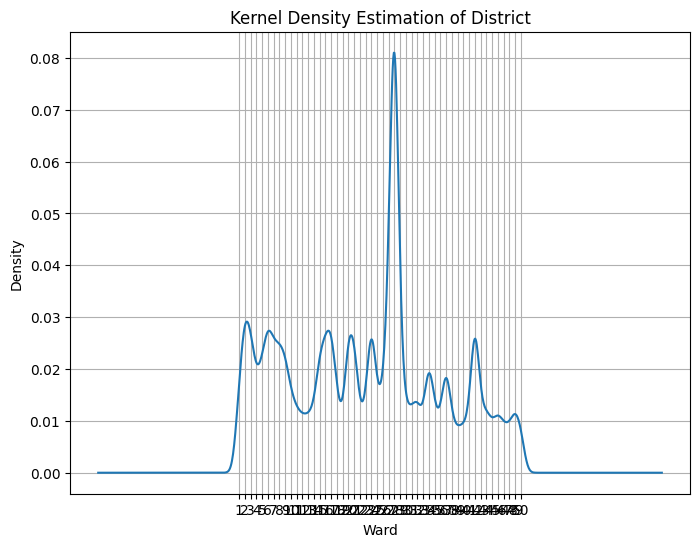

In [ ]:
# KDE plot (Kernel Density Estimation)
plt.figure(figsize=(8, 6))
crime_data['Ward'].plot.kde()
plt.title('Kernel Density Estimation of District')
plt.xlabel('Ward')
plt.ylabel('Density')
plt.xticks(range(int(crime_data['Ward'].min()), int(crime_data['Ward'].max()) + 1, 1))
plt.grid(True)
plt.show()

#### Univariate Analysis of Year

In [ ]:
# Summary statistics
summary_stats = crime_data['Year'].describe()
print("Summary Statistics:")
print(summary_stats)
print()


Summary Statistics:
count    2.278713e+06
mean     2.009638e+03
std      6.019739e+00
min      2.001000e+03
25%      2.004000e+03
50%      2.009000e+03
75%      2.014000e+03
max      2.022000e+03
Name: Year, dtype: float64



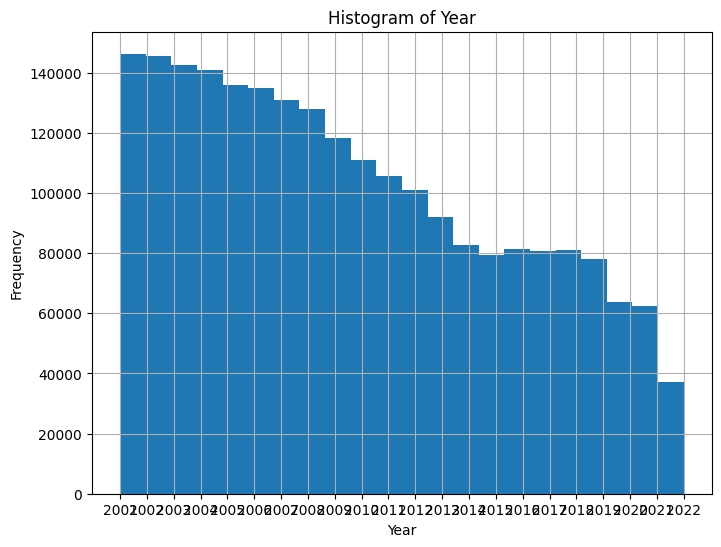

In [ ]:
# Histogram
plt.figure(figsize=(8, 6))
crime_data['Year'].hist(grid=True, bins=22)
plt.title('Histogram of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(range(int(crime_data['Year'].min()), int(crime_data['Year'].max()) + 1, 1))  # Set x-axis ticks to increase by 1
plt.grid(True)
plt.show()


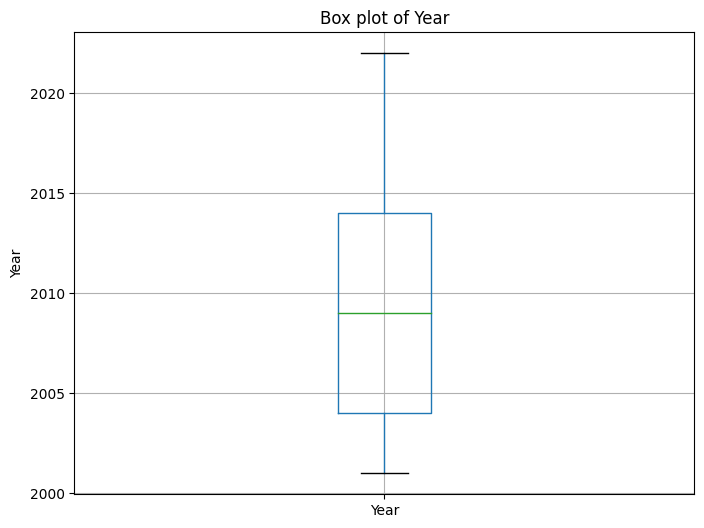

In [ ]:
# Box plot
plt.figure(figsize=(8, 6))
crime_data.boxplot(column= 'Year')
plt.title('Box plot of Year')
plt.ylabel('Year')
plt.grid(True)
plt.show()

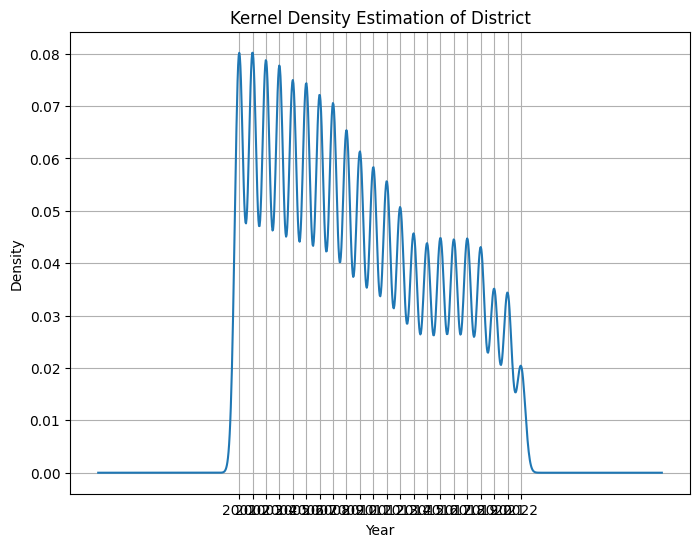

In [ ]:
# KDE plot (Kernel Density Estimation)
plt.figure(figsize=(8, 6))
crime_data['Year'].plot.kde()
plt.title('Kernel Density Estimation of District')
plt.xlabel('Year')
plt.ylabel('Density')
plt.xticks(range(int(crime_data['Year'].min()), int(crime_data['Year'].max()) + 1, 1))
plt.grid(True)
plt.show()

### Bivariate Analysis

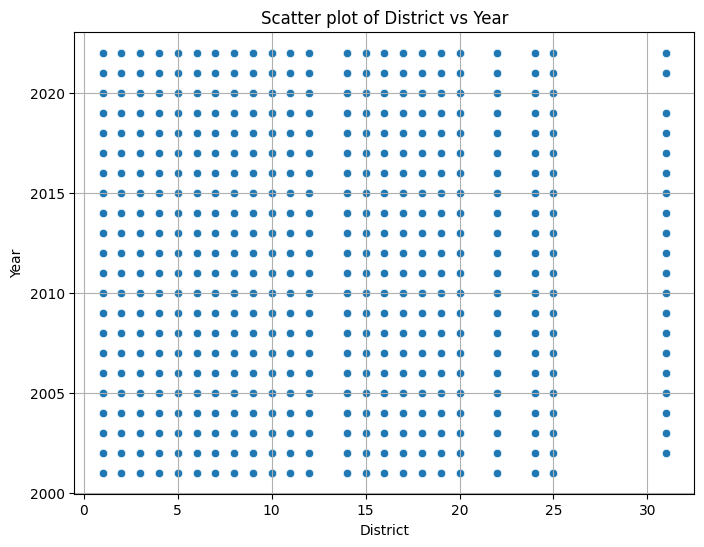

Correlation coefficient between District and Year: -0.007142319732917456


In [ ]:
# Bivariate Analysis of District & Year

x_column = 'District'
y_column = 'Year'

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=crime_data, x=x_column, y=y_column)
plt.title('Scatter plot of ' + x_column + ' vs ' + y_column)
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.show()

# Correlation coefficient
correlation_coefficient = crime_data[x_column].corr(crime_data[y_column])
print(f"Correlation coefficient between {x_column} and {y_column}: {correlation_coefficient}")

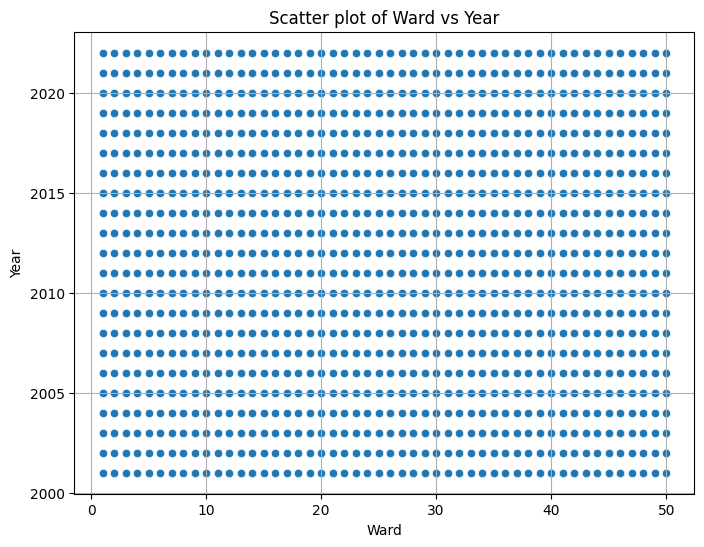

Correlation coefficient between Ward and Year: -0.026522263762234568


In [ ]:
# Bivariate Analysis of Ward & Year

x_column = 'Ward'
y_column = 'Year'

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=crime_data, x=x_column, y=y_column)
plt.title('Scatter plot of ' + x_column + ' vs ' + y_column)
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.show()

# Correlation coefficient
correlation_coefficient = crime_data[x_column].corr(crime_data[y_column])
print(f"Correlation coefficient between {x_column} and {y_column}: {correlation_coefficient}")

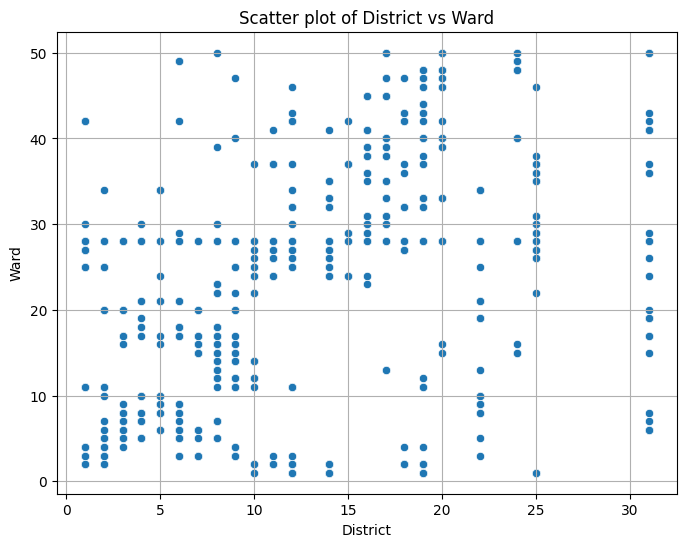

Correlation coefficient between District and Ward: 0.6531897290748506


In [ ]:
# Bivariate Analysis of District & Ward

x_column = 'District'
y_column = 'Ward'

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=crime_data, x=x_column, y=y_column)
plt.title('Scatter plot of ' + x_column + ' vs ' + y_column)
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.show()

# Correlation coefficient
correlation_coefficient = crime_data[x_column].corr(crime_data[y_column])
print(f"Correlation coefficient between {x_column} and {y_column}: {correlation_coefficient}")

In [ ]:
crime_data.columns

Index(['Case Number', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'FBI Code', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Time', 'Day', 'Week', 'Month', 'Season'],
      dtype='object')

### Multivariate Analysis

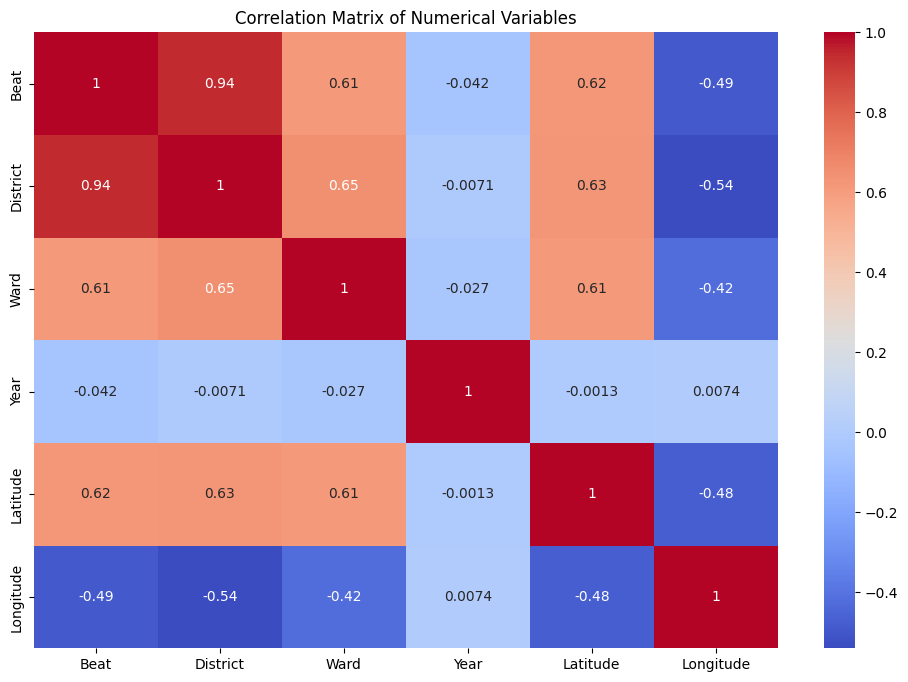

In [ ]:
# Select numerical columns for correlation analysis
numerical_cols = ['Beat', 'District', 'Ward', 'Year', 'Latitude', 'Longitude']

# Calculate the correlation matrix
corr_matrix = crime_data[numerical_cols].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

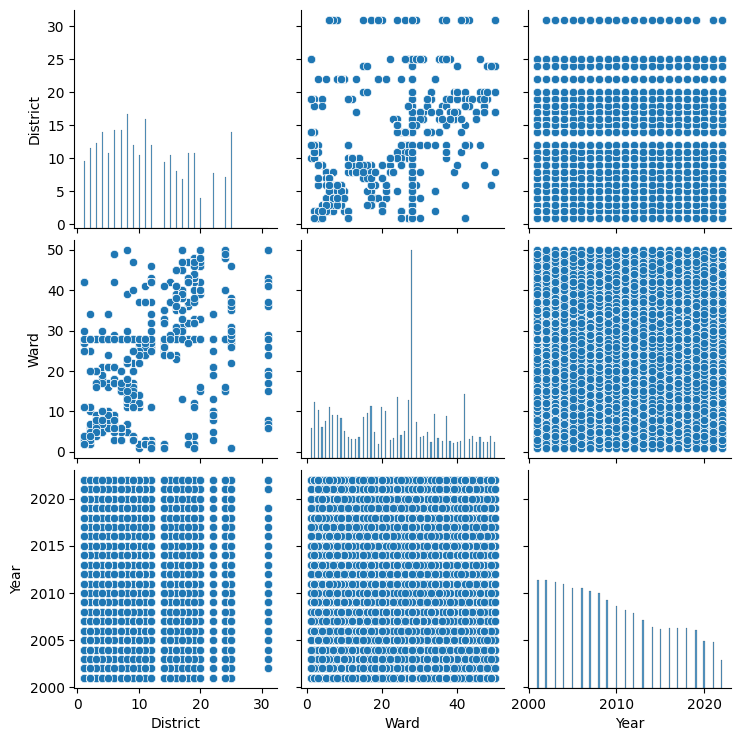

                            OLS Regression Results                            
Dep. Variable:                   Year   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1008.
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        01:29:03   Log-Likelihood:            -7.3227e+06
No. Observations:             2278713   AIC:                         1.465e+07
Df Residuals:                 2278710   BIC:                         1.465e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2009.8623      0.008   2.39e+05      0.0

In [ ]:
# Multivariate Analysis of District, Ward & Year

x_column = 'District'
y_column = 'Ward'
z_column = 'Year'

# Pairplot for visualizing relationships
sns.pairplot(crime_data[[x_column, y_column, z_column]])
plt.show()

X = crime_data[[x_column, y_column]]
y = crime_data[z_column]

X = sm.add_constant(X) # Add a constant term to the predictor variables

model = sm.OLS(y, X).fit()
print(model.summary())

## Descriptive Analysis(Categorical variables)
- using .counts(), value_counts(), Unique(), unique(), sum() etc to get the frequencies of non-categorical data

 NOTE: Since 'Location Description', 'Description' and 'Primary Type' are columns with many categories using them to visualize will kind of give ugly visuals, so it is wise to keep the most frequent categories, let say 20 with the highest value counts, then summarize the rest into "OTHERS".

In [ ]:
# Taking a quick peek at the dataset by visualing it again..
crime_data.head(1)

,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,...,FBI Code,Year,Updated On,Latitude,Longitude,Time,Day,Week,Month,Season
0,HP485721,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,...,14,2008,02/28/2018 03:56:25 PM,41.73998,-87.55512,14:30:00,Saturday,30,July,Summer


In [ ]:
# Lets take a better look at the columns
columns = crime_data.columns
_ = [print(columns) for columns in columns]

Case Number
Block
IUCR
Primary Type
Description
Location Description
Arrest
Domestic
Beat
District
Ward
FBI Code
Year
Updated On
Latitude
Longitude
Time
Day
Week
Month
Season


In [ ]:
# Lets take a look at the categorical data...
categorical_columns = crime_data.select_dtypes(exclude = ['number'])

In [ ]:
# LEts create a dataframe for the categorical data columns
cat_df = crime_data[categorical_columns.columns]
cat_df.head(1)

,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,FBI Code,Updated On,Time,Day,Month,Season
0,HP485721,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,14,02/28/2018 03:56:25 PM,14:30:00,Saturday,July,Summer


In [ ]:
# The next code is going to issue warning, hence the need to import warnings
import warnings
warnings.filterwarnings(action= 'ignore')

In [ ]:
# Lets check the summary of our categorical dataframe by spececially dedscribing it. we are transposing it to have a richer view
categories_summary = cat_df.describe(exclude =['number']).T
categories_summary

,count,unique,top,freq
Case Number,2278713,2278666,HK172551,3
Block,2278713,54347,100XX W OHARE ST,4878
IUCR,2278713,392,0820,184891
Primary Type,2278713,35,THEFT,479373
Description,2278713,515,SIMPLE,268416
Location Description,2278713,198,STREET,593831
Arrest,2278713,2,False,1675241
Domestic,2278713,2,False,1965300
FBI Code,2278713,26,06,479373
Updated On,2278713,4461,02/10/2018 03:50:01 PM,836556


In [ ]:
# Lets look at the "Primary Type" of crime
# We will be looking at the time each crime type occur by frequency
#___________________________________________#

Primay_crime_type_counts = crime_data['Primary Type'].value_counts()
print(Primay_crime_type_counts)
print("")
# lets find the numbers of unique values
numbers_of_primary_type = crime_data['Primary Type'].nunique()
print(f'The total number of Primary Crime Type is {numbers_of_primary_type}')

Primary Type
THEFT                                479373
BATTERY                              418649
CRIMINAL DAMAGE                      259960
NARCOTICS                            222861
ASSAULT                              147664
OTHER OFFENSE                        141627
BURGLARY                             125162
MOTOR VEHICLE THEFT                  105853
DECEPTIVE PRACTICE                    99350
ROBBERY                               85695
CRIMINAL TRESPASS                     63499
WEAPONS VIOLATION                     30211
PROSTITUTION                          20795
OFFENSE INVOLVING CHILDREN            16321
PUBLIC PEACE VIOLATION                15511
SEX OFFENSE                            8806
CRIM SEXUAL ASSAULT                    8363
INTERFERENCE WITH PUBLIC OFFICER       5494
LIQUOR LAW VIOLATION                   4470
GAMBLING                               4345
ARSON                                  3886
HOMICIDE                               3597
KIDNAPPING         

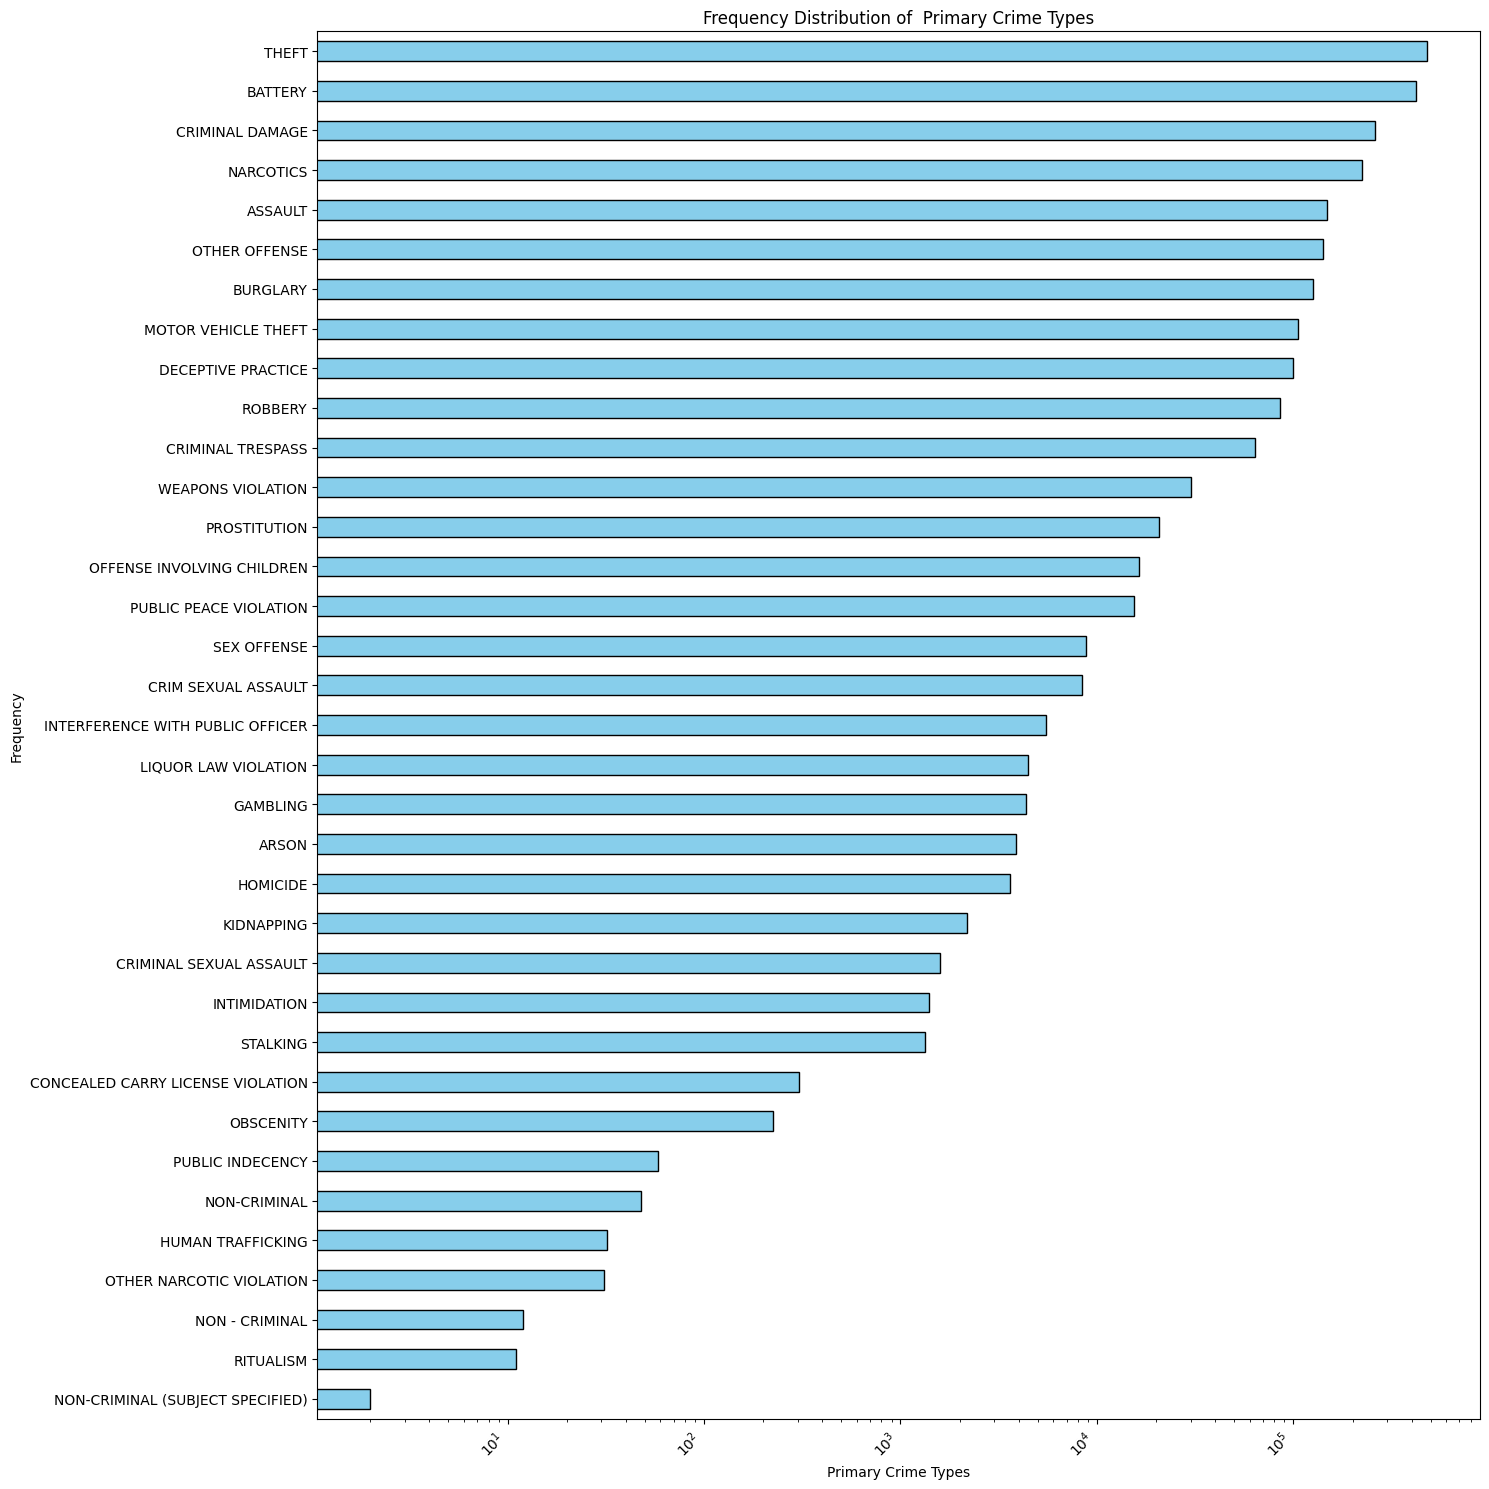

In [ ]:
# # Lets put the above insight in visuals...

# # Lets display it in a frequency plot to understand the distribution preferably barplot
plot_data = Primay_crime_type_counts.sort_values(ascending=True)

plt.figure(figsize=(15,15))
plot_data.plot(kind = 'barh', color = 'skyblue', edgecolor = 'black')
plt.xscale('log')
plt.xticks(rotation = 45, ha='right')
plt.title('Frequency Distribution of  Primary Crime Types')
plt.xlabel('Primary Crime Types')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
#..........................using seaborn..................................#
# plt.figure(figsize=(10,8))

# sns.countplot(data = crime_data, x = 'Primary Type',order= crime_data['Primary Type'].value_counts().index)
# plt.xticks(rotation = 90, ha='right')

# plt.title('Frequency Distribution of  Primary Crime Types')
# plt.xlabel('Primary Crime Types')
# plt.ylabel('Frequency')
# plt.show()

#### Since "THEFT" seems to be the highest type of crime lets take a better look checking how it relates to other features in the dataset

In [ ]:
print("These are the top 10 Location Descriptions where THEFT occurs the most from the highest to the lowest")

THEFT = crime_data.loc[crime_data["Primary Type"] == 'THEFT']
THEFT= THEFT['Location Description'].value_counts()
THEFT.head(12)
#highest_location_where_theft_occurs = THEFT.index[:10]
#_ = [print(highest_location_where_theft_occurs) for highest_location_where_theft_occurs in highest_location_where_theft_occurs]

These are the top 10 Location Descriptions where THEFT occurs the most from the highest to the lowest


Location Description
STREET                            129376
RESIDENCE                          49531
APARTMENT                          26435
OTHER                              25467
SMALL RETAIL STORE                 24171
DEPARTMENT STORE                   23301
PARKING LOT/GARAGE(NON.RESID.)     22249
GROCERY FOOD STORE                 18440
SIDEWALK                           15293
RESTAURANT                         13655
VEHICLE NON-COMMERCIAL             12083
RESIDENTIAL YARD (FRONT/BACK)       8411
Name: count, dtype: int64

NOTE: Since 'Location Description', 'Description' and 'Primary Type' are columns with many categories using them to visualize will kind of give ugly visuals, so it is wise to keep the most frequent categories, let say 20 with the highest value counts, then summarize the rest into "OTHERS".

In [ ]:
# this code separates the first 20 categories with highest frequencies
low_freq_from_20_down_Location_Desc  = list(crime_data['Location Description'].value_counts()[20:].index)
low_freq_from_20_down_Description = list(crime_data['Description'].value_counts()[20:].index)
low_freq_from_20_down_Primary_Type = list(crime_data['Primary Type'].value_counts()[20:].index)

In [ ]:

crime_data.loc[crime_data['Location Description'].isin(low_freq_from_20_down_Location_Desc) , crime_data.columns=='Location Description'] = 'OTHER'
crime_data.loc[crime_data['Description'].isin(low_freq_from_20_down_Description) , crime_data.columns=='Description'] = 'OTHER'
#crime_data.loc[crime_data['Primary Type'].isin(low_freq_from_20_down_Description) , crime_data.columns=='Primary Type'] = 'OTHER'

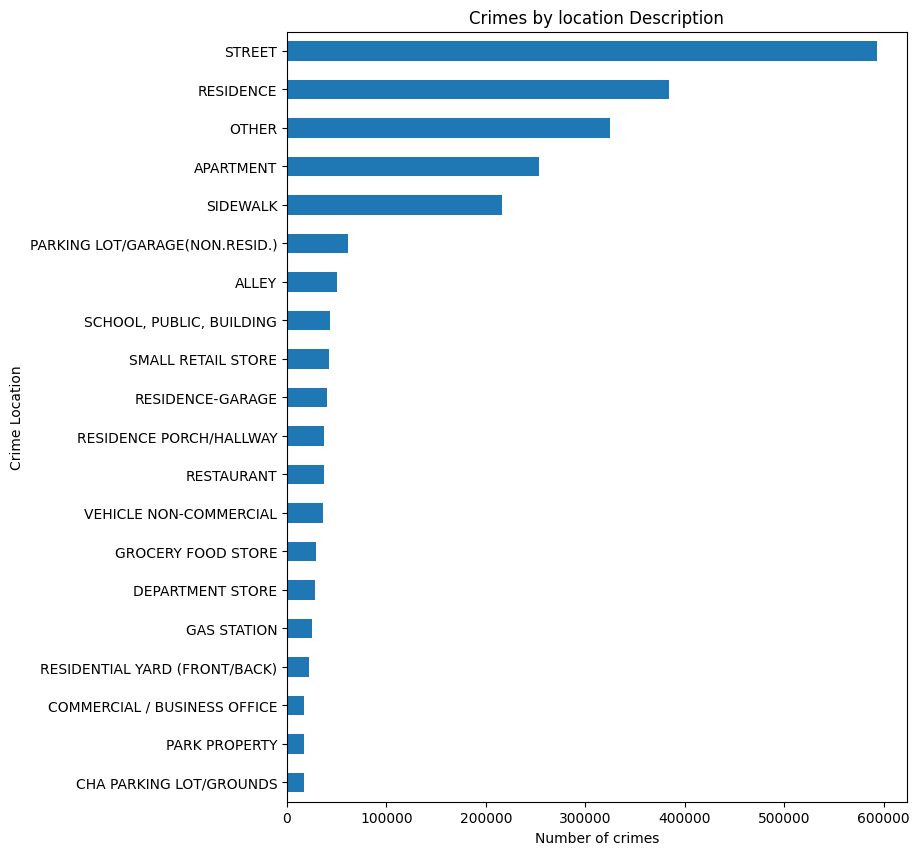

In [ ]:
# lets visualize crime by Location Description if there is any insight there
cat_df = crime_data[['Location Description','Description', 'Primary Type']]
plt.figure(figsize=(8,10))
cat_df.groupby([cat_df['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Crimes by location Description')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()


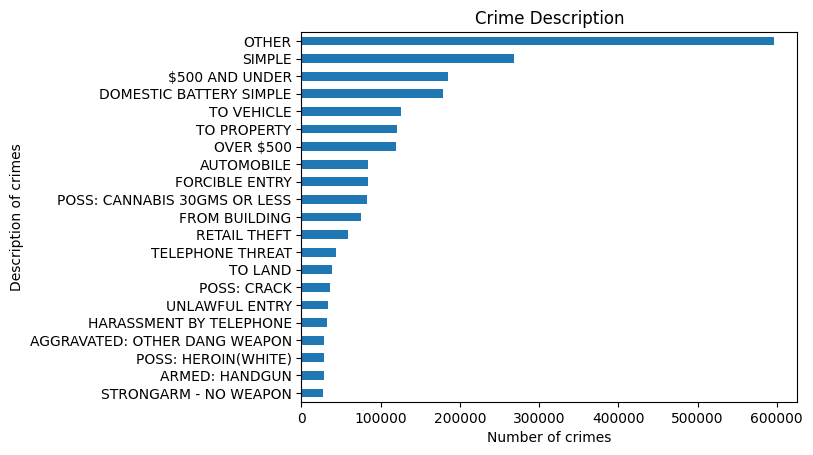

In [ ]:
cat_df.groupby([cat_df['Description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Crime Description')
plt.ylabel('Description of crimes')
plt.xlabel('Number of crimes')
plt.show()

Arrest
False    425137
True      54236
Name: count, dtype: int64


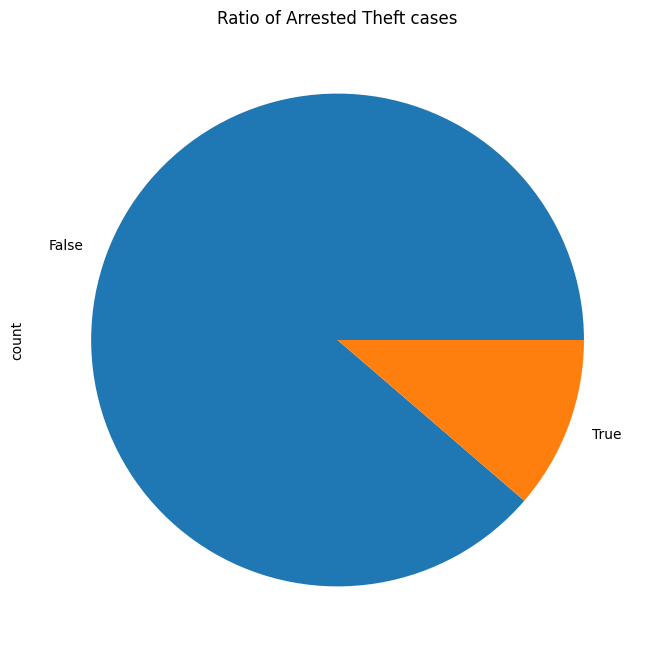

In [ ]:
# Lets see how many of the THEFT cases were arrested
Arrested_crimes = crime_data[crime_data['Primary Type'] == 'THEFT']['Arrest']
Arrest_ratio = Arrested_crimes.value_counts()
print(Arrest_ratio)

plt.figure(figsize=(10,8))
Arrest_ratio.plot(kind = 'pie')
plt.title( 'Ratio of Arrested Theft cases')
plt.show()


Domestic
False    466550
True      12823
Name: count, dtype: int64


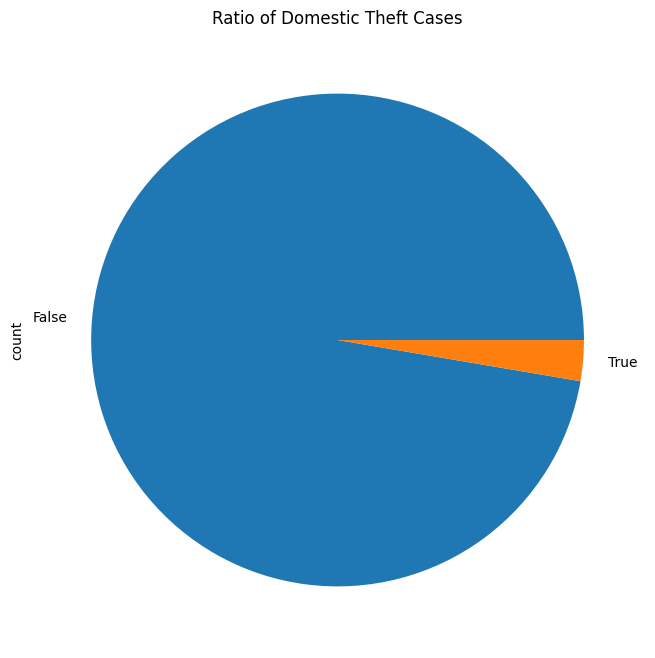

In [ ]:
# Lets see how many of the THEFTs were domestic cases...
Domestic_crime = crime_data[crime_data['Primary Type'] == 'THEFT']['Domestic']
Domestic_ratio = Domestic_crime.value_counts()
print(Domestic_ratio)

plt.figure(figsize=(10,8))
Domestic_ratio.plot(kind = 'pie')
plt.title( 'Ratio of Domestic Theft Cases')
plt.show()


#### Lets explore and visualize the categories by "Date"

In [ ]:
# plt.figure(figsize=(15,5))
# crime_data.resample('M').size().plot(legend=False, color = 'red')
# plt.title('Number of crimes per month (2001 - 2022)')
# plt.xlabel('Months')
# plt.ylabel('Number of crimes')
# plt.show()
# crime_data.plot()

In [ ]:
plt.figure(figsize=(15,5))
crime_data.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2001 - 2022')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

<Figure size 1500x500 with 0 Axes>

In [ ]:
# Creating a pivot table to understand the crime spread by primary crime type and dates...
crimes_count_date = crime_data.pivot_table('Date', aggfunc=np.size, columns='Primary Type', index=crime_data.index.date, fill_value=0)
crimes_count_date.head(1)

In [ ]:
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
crimes_count_date.index
#  we will plot line chart to see how each crime type has increased or declined with time(date)
primary_crime_type_increase_or_decline = crimes_count_date.rolling(365).sum().plot(figsize=(15, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

In [ ]:
# Creating a pivot table to understand the crime spread by primary crime type and dates...
description_count_date = crime_data.pivot_table('Date', aggfunc=np.size, columns='Description', index=crime_data.index.date, fill_value=0)
description_count_date.index = pd.DatetimeIndex(description_count_date.index)
description_count_date.index
#  we will plot line chart to see how each crime type has increased or declined with time(date)
description_increase_or_decline = description_count_date.rolling(365).sum().plot(figsize=(15, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

In [ ]:
# Creating a pivot table to understand the crime spread by primary crime type and dates...
location_desc_count_date = crime_data.pivot_table('Date', aggfunc=np.size, columns='Location Description', index=crime_data.index.date, fill_value=0)
location_desc_count_date.index = pd.DatetimeIndex(location_desc_count_date.index)
location_desc_count_date.index
#  we will plot line chart to see how each crime type has increased or declined with time(date)
Crimes_in_location_desc_increase_or_decline = location_desc_count_date.rolling(365).sum().plot(figsize=(15, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

In [ ]:
plt.figure(figsize = (10,6))
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
crime_data.groupby(['Day']).size().sort_values(ascending = True).plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

In [ ]:
Months = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize = (10,6))
crime_data.groupby(['Month']).size().sort_values(ascending = True).plot(kind='barh')
plt.ylabel('Months of the Year')
plt.yticks(np.arange(12), Months)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by months of the year')
plt.show()

In [ ]:
Seasons = ['Spring','Winter','Fall', 'Summer']
plt.figure(figsize = (10,6))
crime_data.groupby(['Season']).size().sort_values(ascending=True).plot(kind='barh')
plt.ylabel('Seasons of the Year')
plt.yticks(np.arange(4), Seasons)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by Seasons of the year')
plt.show()

In [ ]:
# Lets visualize crime using the Latitide and longitude
# Extracting the top 10 crime locations
crime_locations = crime_data['Location Description'].value_counts(ascending=False).reset_index()
top_locations = crime_locations.head(10)["index"].tolist()

# Filtering the crime data to include only the top locations
crime_subset = crime_data[crime_data["Location Description"].isin(top_locations)]

# Plotting the scatterplot of latitude and longitude with a hue of Location Description
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(data=crime_subset, x="Latitude", y="Longitude", hue="Location Description", palette="Set1")

# Adjusting legend placement
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Location Description", shadow=True)

# Adding labels and title
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Crime Locations')

plt.show()


## Data Wrangling- Gathering insights by answering the questions as listed above
- Manipuate the data to your own taste, but remember to optimise your codes.

**ANALYSING FOR THE HIGHEST CRIMES**

In [ ]:
# the most occurring crime

crime_data['Primary Type'].value_counts().idxmax()

In [ ]:
# the top 5 common crimes in the dataset

primary_type_counts.sort_values(ascending=False).head(5)

In [ ]:
# The overview of all crimes over the years

yearly_crime_trend = crime_data.groupby('Year')['Primary Type'].count()
yearly_crime_trend.sort_values(ascending=False).head(5)

In [ ]:
# finding the individual crime trends over the years

individual_crime_trend = crime_data.groupby('Year')['Primary Type'].value_counts()
individual_crime_trend

**ANALYSING FOR LOCATIONS WHERE CRIMES OCCURS THE MOST**

In [ ]:
# What are the locations where most crimes occur?

crime_type_location = crime_data.groupby('Location Description')['Primary Type'].value_counts()
crime_type_location

Location Description    Primary Type   
ALLEY                   NARCOTICS          14126
                        BATTERY             9140
                        ROBBERY             5994
                        THEFT               4593
                        CRIMINAL DAMAGE     4537
                                           ...  
VEHICLE NON-COMMERCIAL  INTIMIDATION           3
                        NON - CRIMINAL         1
                        RITUALISM              1
                        OBSCENITY              1
                        GAMBLING               1
Name: count, Length: 568, dtype: int64

In [ ]:
# Particular primary crime types that is prone to a particular Location Description

ordered_crime_location = crime_type_location.sort_values(ascending=False)
ordered_crime_location

Location Description    Primary Type   
STREET                  THEFT              129376
OTHER                   THEFT               95061
STREET                  CRIMINAL DAMAGE     93262
RESIDENCE               BATTERY             86877
APARTMENT               BATTERY             86707
                                            ...  
STREET                  NON - CRIMINAL          1
                        RITUALISM               1
RESIDENCE-GARAGE        NON-CRIMINAL            1
APARTMENT               RITUALISM               1
VEHICLE NON-COMMERCIAL  GAMBLING                1
Name: count, Length: 568, dtype: int64

In [ ]:
# Crime locations... lets look at the top 20 locations of crime with the numbers of crimes that happens there...

crime_location = crime_data.groupby('Location Description')['Primary Type'].count()
crime_location_20 = crime_location.sort_values(ascending=False).head(20)
crime_location_20

Location Description
STREET                            593831
RESIDENCE                         384471
OTHER                             324870
APARTMENT                         253114
SIDEWALK                          216275
PARKING LOT/GARAGE(NON.RESID.)     61109
ALLEY                              50652
SCHOOL, PUBLIC, BUILDING           43678
SMALL RETAIL STORE                 42803
RESIDENCE-GARAGE                   40478
RESIDENCE PORCH/HALLWAY            37178
RESTAURANT                         37078
VEHICLE NON-COMMERCIAL             36380
GROCERY FOOD STORE                 29030
DEPARTMENT STORE                   28605
GAS STATION                        25220
RESIDENTIAL YARD (FRONT/BACK)      22562
COMMERCIAL / BUSINESS OFFICE       17251
PARK PROPERTY                      17229
CHA PARKING LOT/GROUNDS            16899
Name: Primary Type, dtype: int64

**ANALYSING TO KNOW IF CRIMES ARE ARRESTED OR NOT**

***How does the distribution of arrests vary across different types of crimes?***

* We identify the crimes contributing the most to the number of arrests

* We calculate the percentages that each crime contribute to the total arrests made

* Interesting to note that 'Criminal Damage' the 3rd most occuring crime, contributes less than 3% to the total arrests

* Another interesting thing we see is that 'Narcotics' makes the most contribution to the arrests made at a little above 1/3rd of total arrests

* And 'Thefts' the most occuring crime in our dataset, contributes a little less than one-tenth of the total arrests


* The 4th most likely crime to lead to an arrest is criminal trespass

* An interesting finding: the chances of an arrest if a Narcotics crime is committed is almost a 100% and for if a criminal trespass crime is committed is 70% while the chances of an arrest if the crime is a crime of theft is 11%

In [ ]:
# Find out the number of arrests we have in the dataset
crime_data['Arrest'].value_counts()

Arrest
False    1675241
True      603472
Name: count, dtype: int64

In [ ]:
arrest_data = crime_data.groupby('Primary Type')['Arrest'].value_counts()

In [ ]:
arrest_data.sort_values(ascending=False)

Primary Type                      Arrest
THEFT                             False     425137
BATTERY                           False     326026
CRIMINAL DAMAGE                   False     242331
NARCOTICS                         True      221528
BURGLARY                          False     118162
                                             ...  
NON-CRIMINAL                      True           6
HUMAN TRAFFICKING                 True           3
NON-CRIMINAL (SUBJECT SPECIFIED)  False          2
NON - CRIMINAL                    True           2
RITUALISM                         True           1
Name: count, Length: 68, dtype: int64

In [ ]:
# change data types from boolean to string to use the data in the arrest and domestic columns
crime_data['Arrest'] = crime_data['Arrest'].astype(str)
crime_data['Domestic'] = crime_data['Domestic'].astype(str)

In [ ]:
total_arrests_made = crime_data[crime_data['Arrest'].str.contains('True')]
total_arrests_made

,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,...,FBI Code,Year,Updated On,Latitude,Longitude,Time,Day,Week,Month,Season
1,JB372830,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,OTHER,OTHER,True,False,413,4.0,...,15,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,10:57:00,Tuesday,31,July,Summer
2,HN308568,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,...,05,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,10:30:00,Friday,17,April,Spring
7,HX527438,043XX W POTOMAC AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,2534,25.0,...,18,2014,02/10/2018 03:50:01 PM,41.904352,-87.734347,11:48:00,Tuesday,49,December,Winter
9,HZ313634,021XX N CALIFORNIA AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,OTHER,True,False,1414,14.0,...,18,2016,02/10/2018 03:50:01 PM,41.921021,-87.697304,23:15:00,Saturday,24,June,Summer
10,HX118914,031XX W WARREN BLVD,2014,NARCOTICS,OTHER,SIDEWALK,True,False,1222,12.0,...,18,2014,02/10/2018 03:50:01 PM,41.881907,-87.704628,09:00:00,Saturday,3,January,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278701,HS554919,080XX S INGLESIDE AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,631,6.0,...,18,2010,02/10/2018 03:50:01 PM,41.748704,-87.601474,21:00:00,Friday,40,October,Fall
2278702,HJ305953,028XX W ARTHINGTON ST,2027,NARCOTICS,POSS: CRACK,STREET,True,False,1135,11.0,...,18,2003,02/28/2018 03:56:25 PM,41.870144,-87.696964,10:30:00,Thursday,16,April,Spring
2278705,HM308975,059XX S STATE ST,1330,CRIMINAL TRESPASS,TO LAND,OTHER,True,False,233,2.0,...,26,2006,02/28/2018 03:56:25 PM,41.786907,-87.625501,23:35:00,Sunday,16,April,Spring
2278708,HZ474139,006XX N CLARK ST,0560,ASSAULT,SIMPLE,OTHER,True,False,1832,18.0,...,08A,2016,02/10/2018 03:50:01 PM,41.893647,-87.631177,14:35:00,Friday,41,October,Fall


In [ ]:
len(total_arrests_made)


603472

In [ ]:
# Find out the percentage of incidents that led to arrests
arrest_pct = len(total_arrests_made) / len(crime_data) * 100
print(round(arrest_pct, 2))

26.48


In [ ]:
arrest_per_crime = total_arrests_made['Primary Type'].value_counts()
arrest_per_crime

Primary Type
NARCOTICS                            221528
BATTERY                               92623
THEFT                                 54236
CRIMINAL TRESPASS                     44743
ASSAULT                               32027
OTHER OFFENSE                         25026
WEAPONS VIOLATION                     22690
PROSTITUTION                          20713
CRIMINAL DAMAGE                       17629
DECEPTIVE PRACTICE                    13751
PUBLIC PEACE VIOLATION                 9926
MOTOR VEHICLE THEFT                    9159
ROBBERY                                8072
BURGLARY                               7000
INTERFERENCE WITH PUBLIC OFFICER       5052
LIQUOR LAW VIOLATION                   4431
GAMBLING                               4308
OFFENSE INVOLVING CHILDREN             3314
SEX OFFENSE                            2431
HOMICIDE                               1711
CRIM SEXUAL ASSAULT                    1299
ARSON                                   471
CONCEALED CARRY LIC

In [ ]:
# A function to calculate the percentage of arrests...
def arrest_percentages(df):
    percentages = (df['Primary Type'].value_counts(normalize=True) * 100).round(2)
    arrest_df = pd.DataFrame({'Primary Type': percentages.index, 'Percentage Arrest': percentages.values})
    arrest_df['Percentage Arrest'] = arrest_df['Percentage Arrest'].astype(str) + '%'
    return arrest_df

In [ ]:
print(f'{arrest_percentages(total_arrests_made)}')

                         Primary Type Percentage Arrest
0                           NARCOTICS            36.71%
1                             BATTERY            15.35%
2                               THEFT             8.99%
3                   CRIMINAL TRESPASS             7.41%
4                             ASSAULT             5.31%
5                       OTHER OFFENSE             4.15%
6                   WEAPONS VIOLATION             3.76%
7                        PROSTITUTION             3.43%
8                     CRIMINAL DAMAGE             2.92%
9                  DECEPTIVE PRACTICE             2.28%
10             PUBLIC PEACE VIOLATION             1.64%
11                MOTOR VEHICLE THEFT             1.52%
12                            ROBBERY             1.34%
13                           BURGLARY             1.16%
14   INTERFERENCE WITH PUBLIC OFFICER             0.84%
15               LIQUOR LAW VIOLATION             0.73%
16                           GAMBLING           

In [ ]:
# Finding percentage of arrest per crimes
trespass_data = crime_data[crime_data['Primary Type'] == 'CRIMINAL TRESPASS']
arrested_trespass = trespass_data[trespass_data['Arrest'].str.contains('True')]

In [ ]:
def arrest_per_crime(df, data):
    percentage = round((len(df) / len(data) * 100), 2)

    return percentage, f"{percentage}%"

In [ ]:
arrest_per_crime(arrested_trespass , trespass_data)

(70.46, '70.46%')

In [ ]:
# Percentage of arrested THEFT

theft_data = crime_data[crime_data['Primary Type'] == 'THEFT']
arrested_theft = theft_data[theft_data['Arrest'].str.contains('True')]
arrest_per_crime(arrested_theft , theft_data) # Apply the function

(11.31, '11.31%')

In [ ]:
# Perctage of arrested NARCOTICS crime

narcotics_data = crime_data[crime_data['Primary Type'] == 'NARCOTICS']
arrested_narcotics = narcotics_data[narcotics_data['Arrest'].str.contains('True')]
arrest_per_crime(arrested_narcotics , narcotics_data)

(99.4, '99.4%')

**ANALYSING DOMESTIC RELATED CRIMES**

 ***What is the proportion of domestic-related incidents compared to others•***

* Domestic crimes contribute a little over 1/8 to all the crimes in the data set

* A little less than 1/5 of all domestic crimes led to arrests

* The most common domestic crime was battery contibuting almost 2/3 to all domestic crimes


In [ ]:
crime_data.columns
crime_data['Domestic'].value_counts()
domestic_crime = crime_data[crime_data['Domestic'].str.contains('True')]
domestic_crime.head(2)

,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,...,FBI Code,Year,Updated On,Latitude,Longitude,Time,Day,Week,Month,Season
11,HP649357,058XX S KEDZIE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,822,8.0,...,08B,2008,02/28/2018 03:56:25 PM,41.787072,-87.703370,17:00:00,Sunday,43,October,Fall
16,HY318953,047XX W FULTON ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1113,11.0,...,08B,2015,02/10/2018 03:50:01 PM,41.885375,-87.743742,03:50:00,Sunday,26,June,Summer


In [ ]:
# The proportion of domestic-related incidents compared to others?
# we have 2 entries for domestic crimes, True or False

def calculate_percentage_of_domestic_crime(domestic_crime, crime_data):
    pct_domestic_crime = len(domestic_crime) / len(crime_data) * 100
    rounded_percentage = round(pct_domestic_crime, 2)
    return f"{rounded_percentage}%"


In [ ]:
calculate_percentage_of_domestic_crime(domestic_crime, crime_data)

'13.75%'

In [ ]:
# what percentage of domestic cases led to arrests

arrested_domestic_crime = total_arrests_made[total_arrests_made['Domestic'] == 'True']

In [ ]:
pct_arrested_domestic_crimes = len(arrested_domestic_crime) / len(domestic_crime) * 100
print(round(pct_arrested_domestic_crimes , 2),'%')

18.9 %


In [ ]:
# Top 10  domestic crimes

domestic_crime_count = domestic_crime['Primary Type'].value_counts().head(10)
domestic_crime_count

Primary Type
BATTERY                       182217
OTHER OFFENSE                  42425
ASSAULT                        33461
CRIMINAL DAMAGE                21812
THEFT                          12823
OFFENSE INVOLVING CHILDREN      8894
CRIMINAL TRESPASS               2263
ROBBERY                         1446
CRIM SEXUAL ASSAULT             1179
DECEPTIVE PRACTICE              1134
Name: count, dtype: int64

In [ ]:
# # Plotting
# plt.figure(figsize=(10, 6))
# domestic_crime_count.plot(kind='bar')
# plt.title('Frequency of Domestic Crimes')
# plt.xlabel('Crime Type')
# plt.ylabel('Frequency')
# plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# plt.tight_layout()
# plt.show()

**NARROW DOWN TO BATTERY, SINCE ITS THE MOST DOMESTIC CRIME**

In [ ]:
battery_data = crime_data[crime_data['Primary Type'] == 'BATTERY']
domestic_battery = battery_data[battery_data['Domestic'] == 'True']
# percentage of battery crimes that were domestic crimes
pct_domestic_battery = len(domestic_battery) / len(domestic_crime) * 100
print(round(pct_domestic_battery , 2),'%')

58.14 %


**LETS NARROW DOWN TO COMMUNITY AREA OR DISTRICTS**

***Are certain types of crimes more prevalent in specific community areas or districts?***


In [ ]:
district_count = crime_data['District'].value_counts()
district_count

District
8.0     153684
11.0    146722
6.0     132761
7.0     132751
25.0    129876
4.0     129838
3.0     115324
12.0    111977
9.0     111424
2.0     108257
18.0    101684
19.0    101492
5.0     101154
15.0     98709
10.0     98172
1.0      90947
14.0     88852
16.0     76513
22.0     74706
24.0     68307
17.0     65647
20.0     39853
31.0        63
Name: count, dtype: int64

In [ ]:
# # Plotting to visualise crimes in different Districts

# plt.figure(figsize=(10, 6))
# district_count.plot(kind='bar')
# plt.title('Frequency of Crime in different Districts')
# plt.xlabel('Districts')
# plt.ylabel('Frequency')
# plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# plt.tight_layout()
# plt.show()

In [ ]:
# Districts and associated crimes
district_data = crime_data.groupby('District')['Primary Type'].value_counts()
district_data

District  Primary Type          
1.0       THEFT                     39734
          BATTERY                    9468
          DECEPTIVE PRACTICE         8936
          CRIMINAL TRESPASS          6417
          CRIMINAL DAMAGE            5071
                                    ...  
31.0      ROBBERY                       2
          MOTOR VEHICLE THEFT           2
          PUBLIC PEACE VIOLATION        1
          ARSON                         1
          BURGLARY                      1
Name: count, Length: 711, dtype: int64

In [ ]:
# districts that are associated with a certain type of crime or where a particular crimea are most frequent.

district_data = district_data.sort_values(ascending=False)
district_data = pd.DataFrame(district_data)
district_data.head()

,,count
District,Primary Type,
18.0,THEFT,42793
1.0,THEFT,39734
11.0,NARCOTICS,39361
19.0,THEFT,34296
7.0,BATTERY,32757


**LETS STILL NARROW DOWN TO DISTRICT-18 and 1.0, SINCE MOST CRIMES ARE PREVALENT THERE ESPECIALLY THEFT.**

In [ ]:
# Chexking out district 18 for insights...

district_18 = crime_data[crime_data['District'] == 18.0]
len(district_18)


101684

In [ ]:
district_18['Primary Type'].value_counts()

Primary Type
THEFT                                42793
BATTERY                              12445
DECEPTIVE PRACTICE                    9433
CRIMINAL DAMAGE                       7490
CRIMINAL TRESPASS                     5072
NARCOTICS                             4081
ASSAULT                               3786
OTHER OFFENSE                         3659
BURGLARY                              3243
MOTOR VEHICLE THEFT                   2737
ROBBERY                               2711
PROSTITUTION                          1451
PUBLIC PEACE VIOLATION                 512
WEAPONS VIOLATION                      488
SEX OFFENSE                            350
CRIM SEXUAL ASSAULT                    295
LIQUOR LAW VIOLATION                   281
OFFENSE INVOLVING CHILDREN             259
INTERFERENCE WITH PUBLIC OFFICER       193
CRIMINAL SEXUAL ASSAULT                133
STALKING                                56
INTIMIDATION                            41
HOMICIDE                                4

In [ ]:
# checking out district 1.0
district_8 = crime_data[crime_data['District'] == 8.0]
len(district_8)

153684

In [ ]:
district_8['Primary Type'].value_counts()

Primary Type
THEFT                                30043
BATTERY                              25794
CRIMINAL DAMAGE                      22689
BURGLARY                             11388
NARCOTICS                            10546
OTHER OFFENSE                        10123
ASSAULT                               9712
MOTOR VEHICLE THEFT                   8732
DECEPTIVE PRACTICE                    6617
ROBBERY                               5925
CRIMINAL TRESPASS                     3053
WEAPONS VIOLATION                     1932
PROSTITUTION                          1375
OFFENSE INVOLVING CHILDREN            1327
PUBLIC PEACE VIOLATION                1305
SEX OFFENSE                            718
CRIM SEXUAL ASSAULT                    575
ARSON                                  333
INTERFERENCE WITH PUBLIC OFFICER       259
LIQUOR LAW VIOLATION                   237
GAMBLING                               226
HOMICIDE                               222
KIDNAPPING                             18

### Time Series Analysis
- Turn the 'Date' column to index(so it becomes the index)
- Add more time features to the dataframe such as time of the day,day, month, and year
- With the new features, manipulate and answer the questions on time series
- Save the new dataframe using to_csv()

In [ ]:
crime_data.columns

         Day  Crime Count
0     Sunday       309571
1     Monday       321761
2    Tuesday       325928
3  Wednesday       328152
4   Thursday       324287
5     Friday       342564
6   Saturday       326450


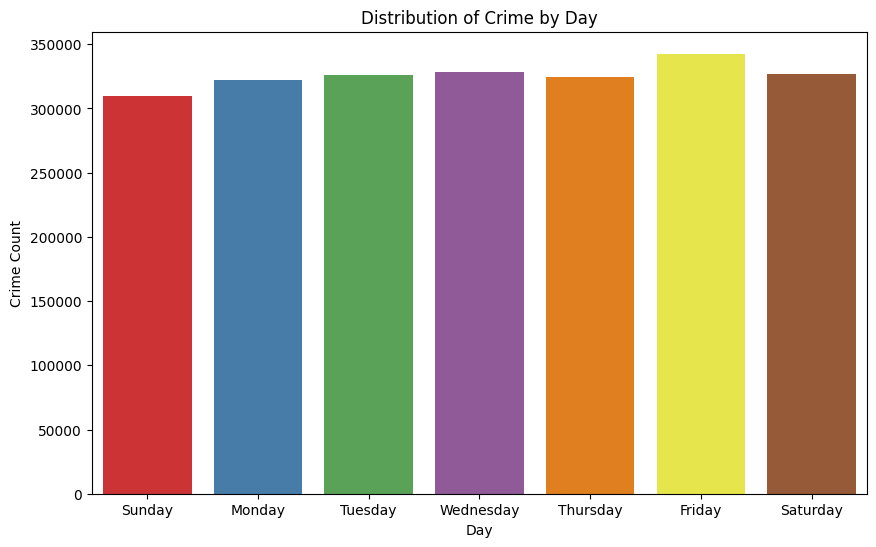

In [ ]:

# Crime distribution by "Day"
crime_day_counts = crime_data['Day'].value_counts().reset_index()
crime_day_counts.columns = ['Day', 'Crime Count']

days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
crime_day_counts['Day'] = pd.Categorical(crime_day_counts['Day'], categories=days_order, ordered=True)
crime_day_counts = crime_day_counts.sort_values('Day')
crime_day_counts.reset_index(drop=True, inplace=True)
print(crime_day_counts)


# Lets plot the crime by Day to visualize it...

crime_day_counts_sorted = crime_day_counts.sort_values(by='Crime Count', ascending=False)

plt.figure(figsize=(10, 6))

plt.xlabel('Day')
plt.ylabel('Crime Count')
plt.title('Distribution of Crime by Day')
plt.show()

#print(f"{crime_day_counts.iloc[0]['Day']} has the highest recorded instances of the occurrence of crime with {crime_day_counts.iloc[-1]['Day']} having the lowest occurrence")

        Month  Crime Count
0     January       180174
1    February       158579
2       March       188763
3       April       187474
4         May       204681
5        June       205061
6        July       213726
7      August       206307
8   September       193529
9     October       195731
10   November       176583
11   December       168105


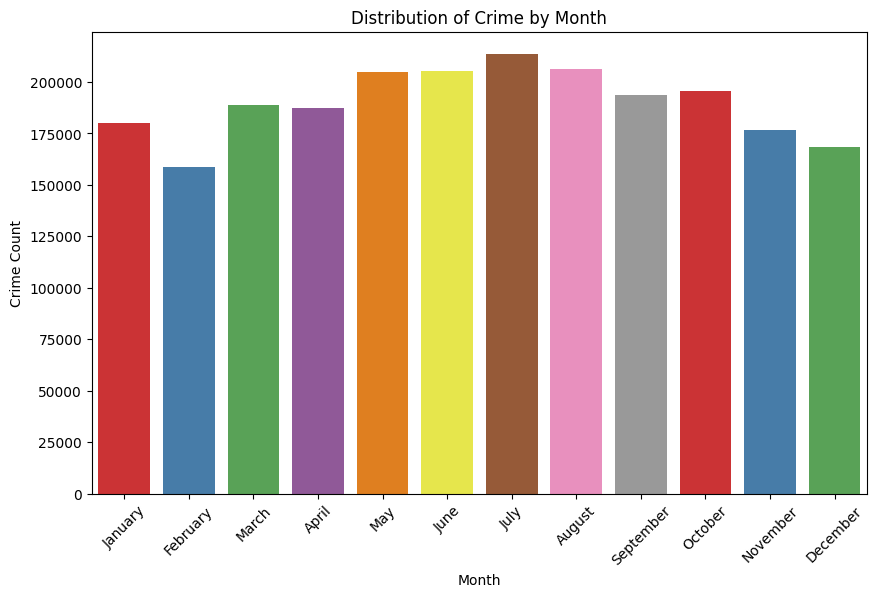

In [ ]:

months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

crime_month_counts = crime_data['Month'].value_counts().reset_index()
crime_month_counts.columns = ['Month', 'Crime Count']

crime_month_counts['Month'] = pd.Categorical(crime_month_counts['Month'], categories=months_order, ordered=True)
crime_month_counts = crime_month_counts.sort_values('Month')
crime_month_counts.reset_index(drop=True, inplace=True)

print(crime_month_counts)


# crime_data.groupby(['Month']).size().sort_values(ascending = True).plot(kind='barh')
# plt.ylabel('Months of the Year')
# plt.yticks(np.arange(12), Months)
# plt.xlabel('Number of crimes')
# plt.title('Number of crimes by months of the year')
# plt.show()


# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=crime_month_counts, x="Month", y="Crime Count", palette="Set1")
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.title('Distribution of Crime by Month')
plt.xticks(rotation=45)
plt.show()


   Season  Crime Count
0  Spring       580918
1  Summer       625094
2    Fall       565843
3  Winter       506858


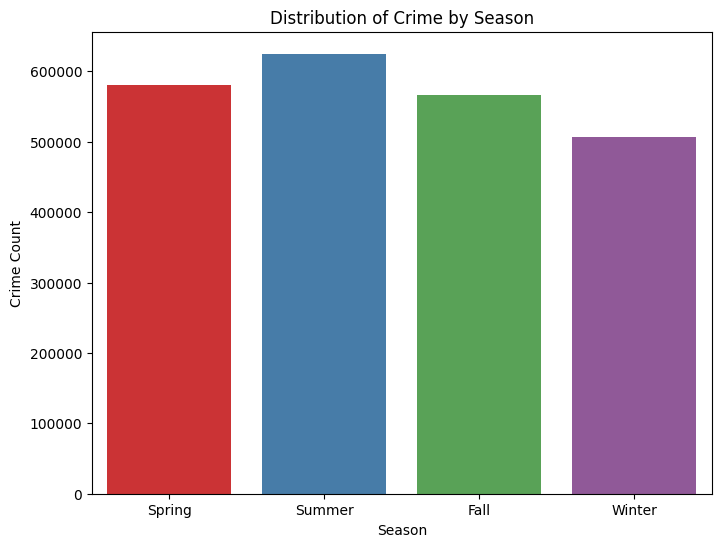

In [ ]:
# Crime frequency according to seasons..
Season_order = ['Spring','Summer','Fall', 'Winter']
crime_season_counts = crime_data['Season'].value_counts().reset_index()
crime_season_counts.columns = ['Season','Crime Count']
crime_season_counts['Season'] = pd.Categorical(crime_season_counts['Season'],categories= Season_order,ordered=True)
crime_season_counts = crime_season_counts.sort_values('Season')
crime_season_counts.reset_index(drop = True, inplace = True)
print(crime_season_counts)

# Lets plot the chat to visalize it
plt.figure(figsize=(8, 6))
sns.barplot(data=crime_season_counts, x="Season", y="Crime Count", palette="Set1")
plt.xlabel('Season')
plt.ylabel('Crime Count')
plt.title('Distribution of Crime by Season')
plt.show()


In [ ]:
yearly_crime_trend = crime_data.groupby('Year')['Primary Type'].count().reset_index()
yearly_crime_trend

,Year,Primary Type
0,2001,146293
1,2002,145443
2,2003,142709
3,2004,140807
4,2005,135745
5,2006,134774
6,2007,130765
7,2008,127898
8,2009,118396
9,2010,111093


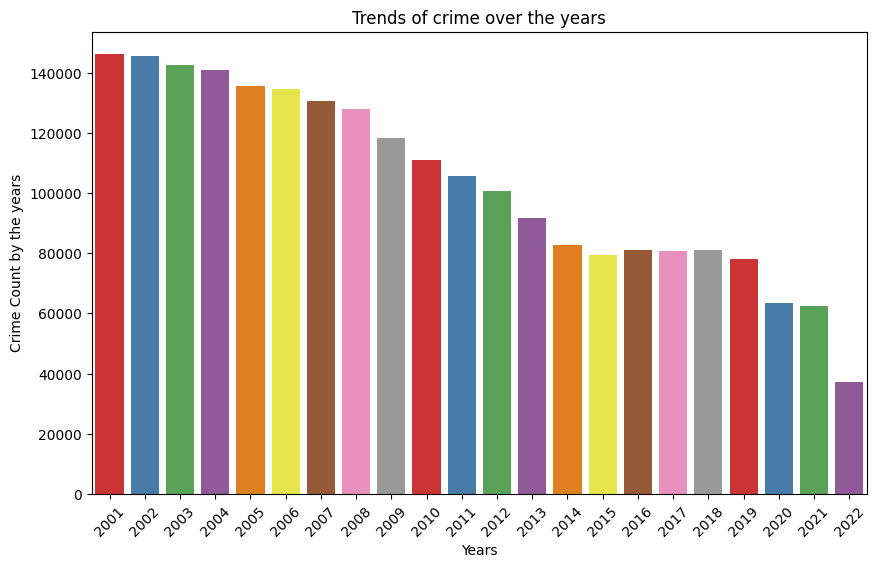

In [ ]:
# Plotting the bar plot for crime trends over the years
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_crime_trend, x="Year", y="Primary Type", palette="Set1")
plt.xlabel('Years')
plt.ylabel('Crime Count by the years')
plt.title('Trends of crime over the years')
plt.xticks(rotation=45)
plt.show()

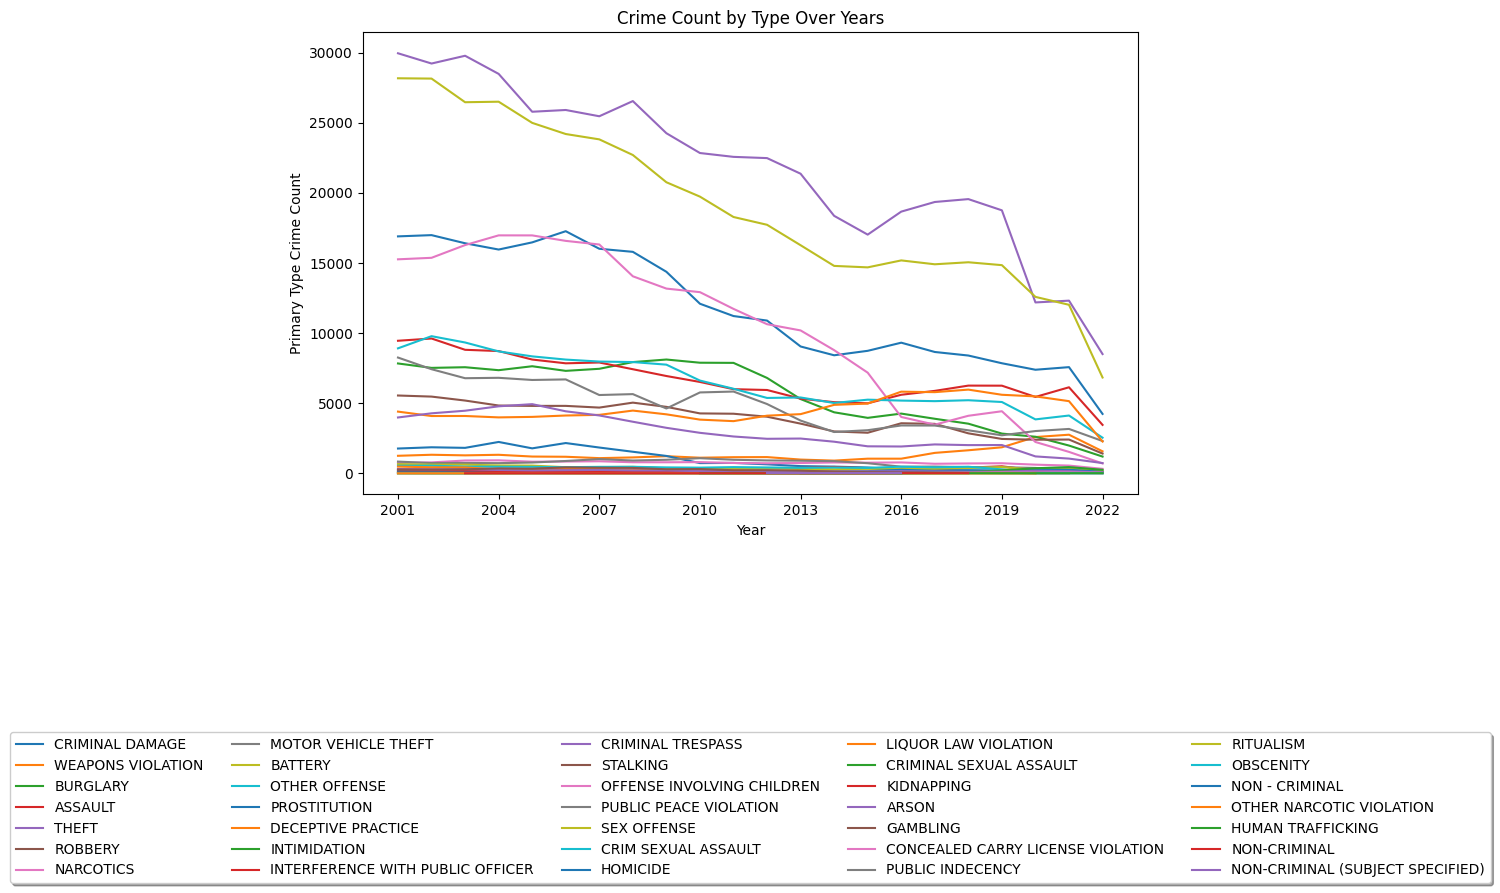

In [ ]:
# This will polt for each crime over the years to see if they have increased or decreased...

crime_counts = crime_data.groupby(['Year', 'Primary Type']).size().reset_index(name='Count')

types = crime_data["Primary Type"].unique().tolist()
fig, ax = plt.subplots(figsize=(10, 6))

for i in types:
    crime_counts[crime_counts["Primary Type"]==i].plot(kind='line', x="Year", y="Count", ax=ax, label=i)

plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), fancybox=True, shadow=True, ncol=5)
plt.xlabel('Year')
plt.ylabel('Primary Type Crime Count')
plt.title('Crime Count by Type Over Years')
plt.show()


## Hypothesis Testing
- Anova
-chi-square
-T-test
-Correlation

### Organise the Visualizations here
- explain insights if possible